<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 

**Nombres:** Sean Nicolás González Vázquez y Doris Gomez Contreras.


**Expediente** : 720083, 713897.
**Profesor:** Oscar David Jaramillo Zuluaga.


# <center> <font color='navy'> COVID-19 en Estados Unidos

### El link donde se estuvo trabajando el ejercicio en Github fue de: [GitHub Repositorio Proyecto COVID](https://github.com/nicoglez/Proyecto-COVID-19-SPF)

 > **Objetivos del proyecto**.

    
•	**Objetivo General:** Buscar predecir el comportamiento del virus en el futuro tomando en cuenta la cantidad de positivos.

•	**Objetivo Secundario:** Encontrar por medio de la simulación de Montecarlo la probabilidad de morirse en caso de estar infectado.

•	**Objetivo Secundario:** Encontrar por medio de la simulación de Montecarlo la probabilidad de recuperarse en caso de ser positivo.

•	**Objetivo Secundario:** Encontrar la posibilidad de ser hospitalizado en caso de ser infectado.

> **Definición del Problema**  

El COVID-19 es una enfermedad conocida como coronavirus que ha afectado el mundo entero en cuestión de meses, el primer brote se produjo en Wuhan en diciembre de 2019.

En este proyecto buscaremos modelar y simular diferentes variables que van relacionadas con este virus con los datos de Estados Unidos por lo cual nuestro modelo final solo podrá predecir el comportamiento del virus en este país. 

La importancia e impacto que este virus ha tomado en la vida diaria, a todos los niveles posibles, a pesar de ser una enfermedad con poco indice de mortalidad (este dato sera comprobado aqui), el corona virus causa una infeccion respiratoria mas fuerte que el resfriado comun, y despues de casi 100 años desde la gripe española, se tuvo una pandemia mundial, asi declarado por la OMS (Organización Mundial de la Salud). Cabe destacar que actualmente el corona virus ha tenido repercusiones sin precedentes en todos los ambitos, tanto economico He aqui la importancia de poder modelar el comportamiento del virus para asi poder predecir sus alcances.

> **Escenarios a simular**

Los nodos o escenarios que elegimos para simular son la cantidad de :
    - Casos positivos
    - Personas recuperadas
    - Personas hospitalizadas 
    - Personas fallecidas

Elegimos estos nodos debido a que nos parece importante predecir el comportamiento del COVID-19, y con sideramos que estos son los datos más representativos.

Los positivos debido a que son la cantidad de personas infectadas, el número de recuperadas para poder analizar qué porcentaje de los casos positivos logran superar el virus, las hospitalizadas que representan las personas que están recibiendo atención médica lo que significa que se encuentran en una situación grave y por último el número de fallecidos que nos indica la mortalidad del virus.

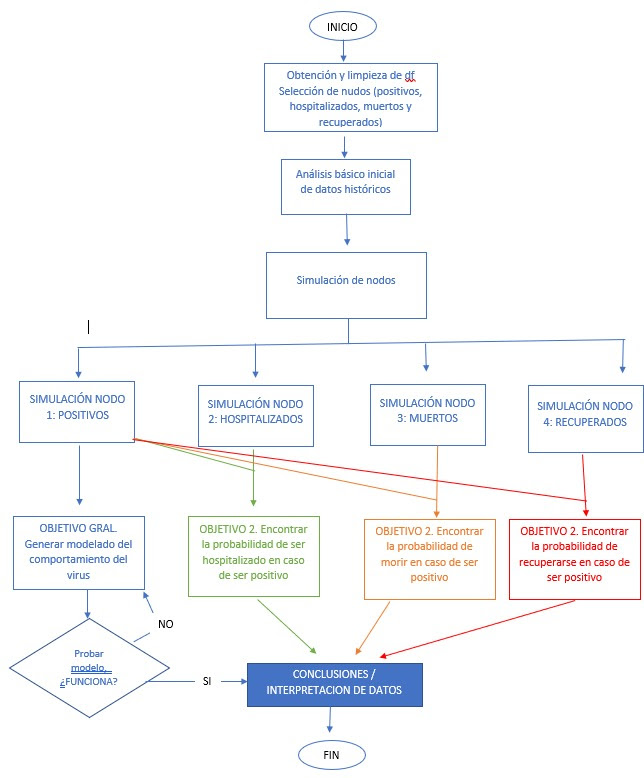

In [1]:
from IPython.display import Image
Image(filename='img.jpg')

> **Supuestos**

•	El modelo a realizar únicamente es funcional si y solo sí se predicen o interpretan información o datos para Estados Unidos.  

•	Se va a tomar como el día más reciente el último dato que tiene el dataframe que es la información actualizada al día 249 del año 2020.

•	Las variables a modelar son las más significativas para predecir la información más importante del impacto del virus y su comportamiento.

• Los datos que se encuentran en el Data Frame no tienen algun tipo de sesgo o fallo, son correctos

> **Hipotesis**

• Ser hospitalizado es necesario para morir de corona virus, no afectan factores extremos como otras enfermedades padecidas por los pacientes.

• Las personas hospitalizadas son hospitalizadas porque estan en un lado extremo del virus, y solo hay dos escenarios despues de n cantidad de tiempo, o se recuperan o mueren. (no quedan en coma u otro efecto secundario de la enfermedad)





In [2]:
# Importacion de todas las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize

## Base de Datos

La base de datos fue obtenida del siguiente link, que contiene bases de datos colaborativas para trabajar, los datos estan actualizados al dia 249 del año 2020. La base de datos es obtenida de un proyecto de seguimiento que esta siendo realizada en conjunto con el NY Times, periodico que hizo publicos los datos. El data set tiene la información condensada de todos las ciudades de Estados Unidos a nivel diario.

Link que lleva al data set en Kaggle: [COVID 19 DATA SET ](https://www.kaggle.com/sudalairajkumar/covid19-in-usa)


In [3]:
# Lectura de Data Frame
data = pd.read_csv('us_covid19_daily.csv')
data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200927,56,7080459,90648092,11136.0,29432.0,404083.0,6080.0,20049.0,1511.0,...,101298794,2020-09-27T00:00:00Z,0,0,307,758,665609,35289,806258,e7c64e674bfc2af02802153452e53628d44c241c
1,20200926,56,7045170,89982483,11183.0,29554.0,403325.0,6057.0,20002.0,1509.0,...,100492536,2020-09-26T00:00:00Z,0,0,866,1154,886140,47733,1004261,e98f5076c72de4a27a283d22756b7d0b9a44d41f
2,20200925,56,6997437,89096343,10905.0,29769.0,402171.0,6133.0,19919.0,1506.0,...,99488275,2020-09-25T00:00:00Z,0,0,844,1331,856519,55526,1011675,8d311e73fe038522a1a6be4bc3202de206ec0adb
3,20200924,56,6941911,88239824,12008.0,30043.0,400840.0,6168.0,19555.0,1560.0,...,98476600,2020-09-24T00:00:00Z,0,0,921,1588,823449,43772,940353,375a88dd29991abc1946cd7f98f4f20a9e37fb5d
4,20200923,56,6898139,87416375,10535.0,29905.0,399252.0,6113.0,19452.0,1544.0,...,97536247,2020-09-23T00:00:00Z,0,0,1157,1451,800878,38567,923704,b4fe7067370631b26f8e988fd2524b5691235a09


## Limpieza de datos

In [4]:
clean_data = pd.DataFrame()
# Filtrar las variables a analizar
clean_data['positives'] = data.T.loc['positive']
clean_data['recovered'] = data.T.loc['recovered']
clean_data['hospitalized'] = data.T.loc['hospitalizedCurrently']
clean_data['death'] = data.T.loc['death']
# Invertir datos para tener los valores iniciales al principio
clean_data = clean_data.iloc[::-1] 
# Reemplazar index por uno que tenga los vlores de forma descendiente
clean_data['index'] = [i for i in range(len(clean_data['death']))]
clean_data.set_index('index', inplace = True)
# Eliminar hasta primer positivo
clean_data = clean_data.iloc[37:,:]
# llenar valores nulos
clean_data.fillna(0,inplace = True)
# Mostrar la cola del data frame
clean_data

,positives,recovered,hospitalized,death
index,,,,
37,0,0.0,0.0,4.0
38,18,0.0,0.0,5.0
39,50,0.0,0.0,8.0
40,94,0.0,0.0,11.0
41,142,0.0,0.0,14.0
...,...,...,...,...
245,6898139,2672338.0,29905.0,193931.0
246,6941911,2710183.0,30043.0,194852.0
247,6997437,2727335.0,29769.0,195696.0


## <center> <font color='navy'> Simulacion de Montecarlo <center> <font color='navy'>


## Simulacion para escenario 1: **Positivos**

In [5]:
# nombrar variable que contenga datos del df determinados
positivos = clean_data['positives']
positivos.head()

index
37      0
38     18
39     50
40     94
41    142
Name: positives, dtype: int64

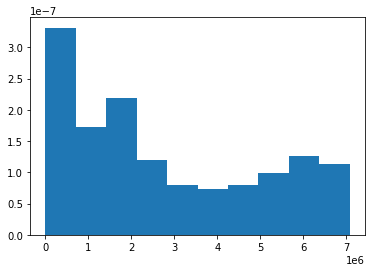

In [6]:
# plotear histograma de los datos

J = 10  # Cantidad de particiones del histograma
[freq, x_hist, _] = plt.hist(positivos,bins = J, density = True ); # histograma
plt.show() # mostrar histograma
x_hist = x_hist[1:] # Se obvia el último valor de x para obtener exactamente J muestras de x

### Estimacion de la f para el metodo de la transformada inversa por medio de la comprobacion de distribucion de probabilidad 

Primero en el siguiente codigo se probaron todas las distribuciones posibles en distlist, con:
```
[dist for dist in dir(st) if isinstance(getattr(st, dist), st.rv_continuous)]
```
Que arroja todas las distribuciones continuas que contiene la libreria st, y si dejaron las distribuciones que obtuvieron un menor error para distriuir los datos, para facilitar la visualizacion al lector.

El error de la distribucion bradford es de 38.33421046165682 %
El error de la distribucion beta es de 71.93971359008366 %
El error de la distribucion expon es de 80.58301412134102 %
El error de la distribucion exponnorm es de 80.82365169556672 %
El error de la distribucion norm es de 84.99327643452021 %
El error de la distribucion uniform es de 43.1924882629108 %
El error de la distribucion foldnorm es de 65.34186037890302 %
El error de la distribucion gennorm es de 43.19248437306957 %
El error de la distribucion ksone es de 43.5098866936486 %


C:\Users\nicol\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:98: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)


El error de la distribucion kappa4 es de 37.4248824236662 %
El error de la distribucion johnsonsb es de 48.50271708941329 %


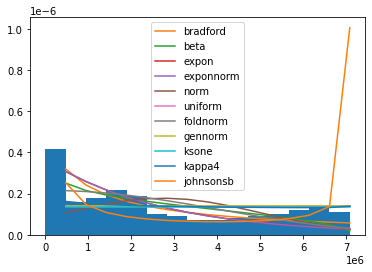

In [7]:
data = positivos

# Probar diferentes distirbuciones de probabilidad
dist_list = ['bradford', 'beta','expon', 'exponnorm','norm','uniform','foldnorm', 'gennorm', 'ksone', 'kappa4', 'johnsonsb']

y_real, x_real,  _ = plt.hist(data, bins = 15, density = True) #hacer histograma

x_real = x_real[1:] # modificar shape para que rea igual

#e = []
def distribucion(dist_list):
    
    def imprimir(dist):
        param = getattr(st, dist).fit(data)
        y_est = getattr(st, dist).pdf(x_real, *param)
        plt.plot(x_real,y_est, label = dist);
        print('El error de la distribucion', dist,'es de', (abs(y_real-y_est)*100/y_est).mean(),'%')
        
    [imprimir(dist) for dist in dist_list]


distribucion(dist_list)
plt.legend()
plt.show()


Podemos notar que la distribucion que menor error tuvo fue la de la distribucion kappa 4, con un error de 37.42%, procederemos a hacer una prueba de hipotesis para comprobar que la distribucion que tenemos es kappa 4.

Aplicando como hipotesis iniciales que:

* H0: El conjunto de datos distribuye como una funcion de distribucion kappa4
* H1: El conjunto de datos no distribuye como kappa4

*Prueba de la Chi Cuadrada*

In [8]:
param = getattr(st, 'kappa4').fit(x_hist) # obtener los parametros
pi = st.kappa4.pdf(x_hist, *param)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_hist*pi

# Cálculo teórico de la chi cuadrada
x2 = ((freq - Ei)**2 / Ei).sum()
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
m = J-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  6.860510859985095
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=6.860510859985095, pvalue=0.6516395876598409)
Estadístico de chi_cuadrado =  16.918977604620448


Se acepta H0 debido a que $\chi^2 < \chi^2_{1-\alpha,m}$, por lo tanto, no se puede rechazar que los datos distribuyen como la funcion kappa 4, ademas el p value es grande Y SI ES GRANDE NO RECHAZO

*Q-Q test*

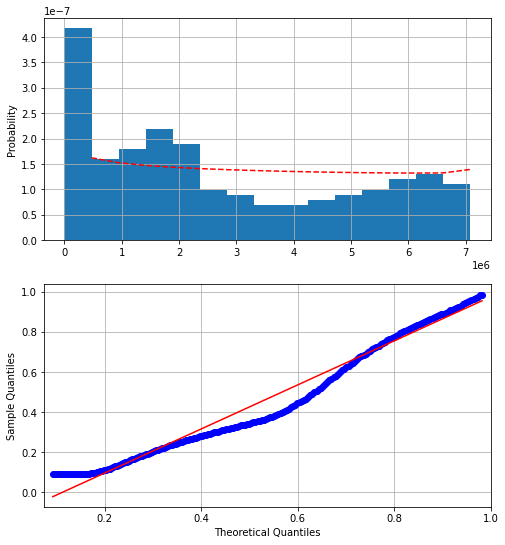

In [9]:
# Histograma de las variables creadas
fig, ax = plt.subplots(2,1, figsize=(8,9))

y, x, _ = ax[0].hist(data,bins = 15, density=True)
x = x[1:]
plt.grid()
ax[0].grid()
#datos
dist = 'kappa4'
params = getattr(st, dist).fit(data)
# Graficar PDF de la distribución que queremos probar
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')

import statsmodels.api as sm 
grap1 = sm.qqplot(data, dist=dist, line='q', fit=True, ax=ax[1])


Podemos observar que los quantiles de los datos reales no se ajustan de manera correcta a los quantiles de la distribucion kappa 4, en medio y al final en su mayoria, por lo cual, al tratar de modelar los datos que se tienen con una distribucion kappa 4, se tendria mucho error, por lo cual,  **Se rechaza H0**.

En conclusion la distribucion kappa4 no es aceptable para modelar este conjunto de datos, se puede obtener una mejor distribucion, asi que se procedera a encontrar una f con Kernel Density Estimation

### Estimacion de la f para el metodo de aceptacion rechazo con Kernel Density Estimation

In [10]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate

# funcion que retorna una funcion de densidad de probabilidad de un conjunto de datos
def kde_statsmodels_mf(x, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',
                          var_type='c', **kwargs)
    return lambda x_grid: kde.pdf(x_grid)

C:\Users\nicol\anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


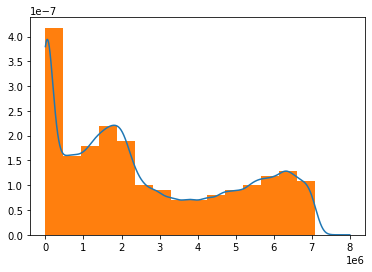

In [11]:
func_positivos = kde_statsmodels_mf(positivos)
x_g = np.arange(0,8e6,100)
plt.figure()
plt.plot(x_g,func_positivos(x_g));
plt.hist(positivos,bins = 15, density = True);
plt.show()

### Metodo de aceptacion rechazo con KDE

Procedemos a aplicar el metodo de aceptacion rechazo con la funcion obtenida por KDE

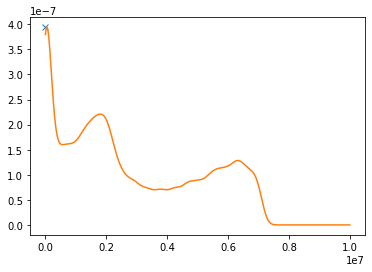

In [12]:
# la funcion obtenenida por kde es la siguiente
f = func_positivos
# encontrar el maximo de la funcion y plotearlo
x = np.arange(0,10e6,100)
max_fp = f(optimize.fmin(lambda x:-f(x),0,disp=False))
plt.plot(0,max_fp,'x',lw = 10)
plt.plot(x,func_positivos(x))

#### Generacion de variables aleatorias montecarlo crudo

In [13]:
np.random.seed(555555)
def acep_rechazo_positivos(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid positivos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,8e6,1)

        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X


f = func_positivos # funcion
N = 1000 # numero de variables que distribuyen como f a generar

# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
var_aleatorias_montecarlo_p = acep_rechazo_positivos(f,max_fp,N)
len(var_aleatorias_montecarlo_p)

1000

La media de las variables generadas fue de  2843741.9827392357


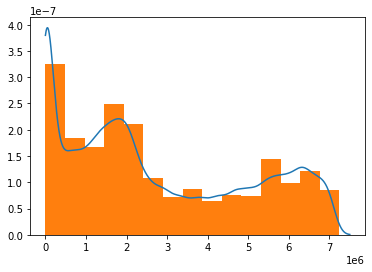

In [14]:
x = np.arange(0,7.5e6,100)
print('La media de las variables generadas fue de ', var_aleatorias_montecarlo_p.mean())

plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_p,bins = 15, density = True);
plt.show()

#### Generacion de variables aleatorias por medio de reduccion de varianza 


In [15]:
np.random.seed(33333)
def acep_rechazo_strat_pos(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid positivos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    B = 3500
    U2 = np.random.rand(B)
    k = np.arange(0,B)
    v = (U2+k)/B
    j = 0
    while i < N:
        R2 = np.random.uniform(0,max_f)
        R1 = 8e6 * v[j]
        j += 1
        if R2 < f([R1]):
            X[i] = R1
            i+=1
    return X 
    
# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
var_aleatorias_strat_p = acep_rechazo_strat_pos(f,max_fp,N)
len(var_aleatorias_strat_p)


1000

La media de las variables aleatorias estratificadas es de 2744559.61463232


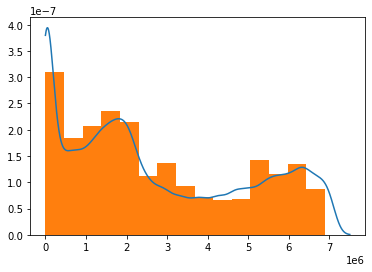

In [16]:
print('La media de las variables aleatorias estratificadas es de', var_aleatorias_strat_p.mean() )
x = np.arange(0,7.5e6,100)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_strat_p, bins = 15, density = True);
plt.show()

**Intervalos de confianza y Montecarlo**

In [17]:
# Media real de los datos
media_real_positivos = clean_data['positives'].mean()
media_real_positivos

2742034.943661972

In [18]:
# Intervalos de confianza y media de los datos para metodo de montecarlo curdo
X = var_aleatorias_montecarlo_p
confianza = 0.90
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_positivos = np.mean(X)
#print('Con una confianza de %2.2f la media del numero de positivos por montecarlo crudo  estará en el intervalo t,\n %s' %(confianza,i1))
print('Con una confianza de %2.2f la media del numero de positivos por montecarlo crudo  estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada por montecarlo crudo del numero de positivos' ,media_positivos)
error_positivos = abs(np.array(media_real_positivos - media_positivos)/media_positivos)
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', error_positivos*100,'%')

Con una confianza de 0.90 la media del numero de positivos por montecarlo crudo  estará en el intervalo normal,
 (2729717.3587936223, 2957766.606684849)
Media calculada por montecarlo crudo del numero de positivos 2843741.9827392357
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 3.5765213473866018 %


In [19]:
# Intervalos de confianza y media de los datos para metodo estratificado igualmente espaciado
X = var_aleatorias_strat_p 
confianza = 0.90
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_positivos_strat = np.mean(X)
#print('Con una confianza de %2.2f la media del numero de positivos por estratificado estará en el intervalo t,\n %s' %(confianza,i1))
print('Con una confianza de %2.2f la media del numero de positivos por estratificado estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada por estratificado del numero de positivos' ,media_positivos_strat)
error_positivos = abs(np.array(clean_data['positives']).mean() - media_positivos_strat)/media_positivos_strat
print('El porcentaje de error entre la media real y la media estimada por estratificado con montecarlo fue de', error_positivos*100,'%')

Con una confianza de 0.90 la media del numero de positivos por estratificado estará en el intervalo normal,
 (2637512.2226333246, 2851607.0066313157)
Media calculada por estratificado del numero de positivos 2744559.61463232
El porcentaje de error entre la media real y la media estimada por estratificado con montecarlo fue de 0.0919881993777132 %


> **Conclusiones Escenario 1**

Los resultados obtenidos modelan de forma aceptable el comportamiento de los positivos de covid, y conseguimos con el metodo de Kernel Density Estimation un mejor resultado del que hubieramos obtenido con las distribuciones conocidas, debido a que ninguna modelo de forma correcta los datos.

El metodo estratificado igualmente espaciado si ayudo a disminuir la varianza de los datos, disminuyendo el intervalo de confianza, y modelando de mejor manera los datos, se disminuyo el error a un 0.09198% lo cual es muy poco

## Simulacion para escenario 2: **Muertos**

In [20]:
# nombrar variable que contenga datos del df determinados
muertos = clean_data['death']
muertos

index
37          4.0
38          5.0
39          8.0
40         11.0
41         14.0
         ...   
245    193931.0
246    194852.0
247    195696.0
248    196562.0
249    196869.0
Name: death, Length: 213, dtype: float64

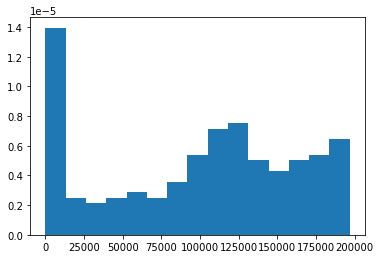

In [21]:
# Plotear histograma

J = 15  # Cantidad de particiones del histograma
[freq, x_hist, _]  = plt.hist(muertos,bins = J, density = True); # plotear histograma
plt.show()
x_hist = x_hist[1:] # Se obvia el último valor de x para obtener exactamente J muestras de x


### Estimacion de la f para el metodo de la transformada inversa por medio de la comprobacion de distribucion de probabilidad 

Primero en el siguiente codigo se probaron todas las distribuciones posibles en distlist, con:
```
[dist for dist in dir(st) if isinstance(getattr(st, dist), st.rv_continuous)]
```
Que arroja todas las distribuciones continuas que contiene la libreria st, y si dejaron las distribuciones que obtuvieron un menor error para distriuir los datos, para facilitar la visualizacion al lector.

C:\Users\nicol\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


El error de la distribucion alpha es de 7869.880167943704 %
El error de la distribucion expon es de 115.22884854061199 %
El error de la distribucion argus es de 63.79429267683295 %
El error de la distribucion bradford es de 48.10610759523119 %


C:\Users\nicol\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:922: RuntimeWarning: overflow encountered in power
  - sc.xlog1py(d_+1, x_**(-c_))))


El error de la distribucion burr es de 57.8206676562624 %
El error de la distribucion genpareto es de 45.6912756651298 %
El error de la distribucion gennorm es de 40.187889807810265 %
El error de la distribucion kappa3 es de 41.06358461761169 %
El error de la distribucion kappa4 es de 41.446683340538534 %
El error de la distribucion ksone es de 40.246258027388166 %
El error de la distribucion uniform es de 40.18779342723005 %


C:\Users\nicol\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:98: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)


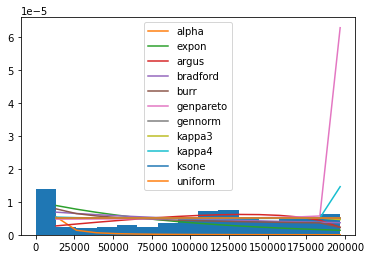

In [22]:
data = muertos

# Probar diferentes distirbuciones de probabilidad
dist_list = ['alpha','expon','argus', 'bradford', 'burr', 'genpareto', 'gennorm', 'kappa3','kappa4','ksone','uniform']

y_real, x_real,  _ = plt.hist(data, bins = 15, density = True) #hacer histograma

x_real = x_real[1:] # modificar shape para que rea igual

#e = []
def distribucion(dist_list):
    
    def imprimir(dist):
        param = getattr(st, dist).fit(data)
        y_est = getattr(st, dist).pdf(x_real, *param)
        plt.plot(x_real,y_est, label = dist);
        print('El error de la distribucion', dist,'es de', (abs(y_real-y_est)/y_est).mean()*100,'%')
        
    [imprimir(dist) for dist in dist_list]


distribucion(dist_list)
plt.legend()
plt.show()

Podemos notar que la distribucion que menor error tuvo fue la de la distribucion uniforme, con un error de 40.1877%, procederemos a hacer una prueba de Q-Q para comprobar que la distribucion que tenemos es uniforme.

Aplicando como hipotesis iniciales que:

* H0: El conjunto de datos distribuye como una funcion de distribucion uniforme
* H1: El conjunto de datos distribuye como cualquier otra distribucion de probabilidad

Prueba de la Chi Cuadrada

In [23]:
param = getattr(st, 'uniform').fit(x_hist) # obtener los parametros
pi = st.uniform.pdf(x_hist, *param)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_hist*pi

# Cálculo teórico de la chi cuadrada
x2 = ((freq - Ei)**2 / Ei).sum()
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
m = J-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  8.571602733166003
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=8.571602733166003, pvalue=0.8574766751747848)
Estadístico de chi_cuadrado =  23.684791304840576


No podemos rechazar la $H_0$ por lo tanto los datos distribuyen uniformes, debido a que  $\chi^2<\chi^2_{1-\alpha,m}$.

Prueba Q-Q

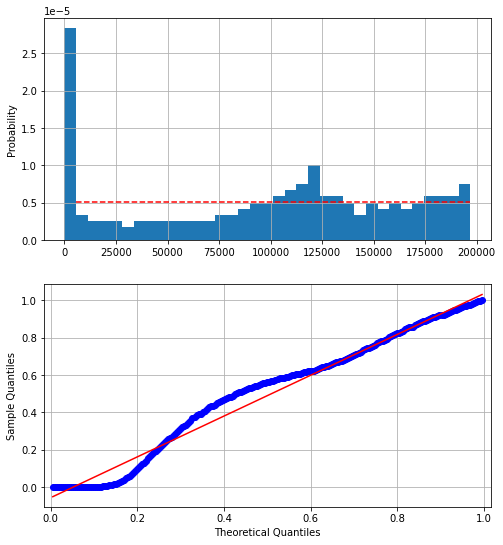

In [24]:
# Histograma de las variables creadas
fig, ax = plt.subplots(2,1, figsize=(8,9))

y, x, _ = ax[0].hist(data,bins = 35, density=True)
x = x[1:]
plt.grid()
ax[0].grid()
#datos
dist = 'uniform'
params = getattr(st, dist).fit(data)
# Graficar PDF de la distribución que queremos probar
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')

import statsmodels.api as sm 
grap1 = sm.qqplot(data, dist=dist, line='q', fit=True, ax=ax[1])


**Conclusion**

Podemos observar que los quantiles de los datos reales no se ajustan de manera correcta a los quantiles de la distribucion uniforme, aunque en algunos lados si se acomoda, en general al tratar de modelar los datos que se tienen con una distribucion beta, se tendria mucho error, por lo cual,  **Se rechaza H0**.

En conclusion la distribucion uniforme no es aceptable para modelar este conjunto de datos, asi que se procedera a encontrar una f con Kernel Density Estimation

### Estimacion de la f para el metodo de aceptacion rechazo con Kernel Density Estimation

C:\Users\nicol\anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


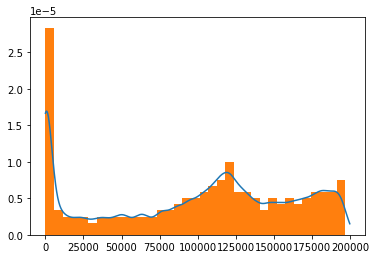

In [25]:
func_muertos = kde_statsmodels_mf(muertos)
x_m = np.arange(0,200000,100)
plt.figure()
plt.plot(x_m,func_muertos(x_m));
plt.hist(muertos,bins = 35, density = True);
plt.show()

### Metodo de aceptacion rechazo con KDE

Procedemos a aplicar el metodo de aceptacion rechazo con la funcion obtenida por KDE

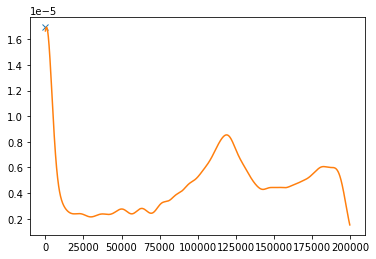

In [26]:
# la funcion obtenenida por kde es la siguiente
f = func_muertos
# encontrar el maximo de la funcion y plotearlo
x = np.arange(0,200000,100)
max_fm = f(optimize.fmin(lambda x:-f(x),0,disp=False))
plt.plot(0,max_fm,'x',lw = 10)
plt.plot(x,func_muertos(x))

#### Generacion de variables aleatorias montecarlo crudo

In [27]:
np.random.seed(666666)
def acep_rechazo_muertos(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid muertos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,200000,1)
        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X


f = func_muertos # funcion
N = 1000 # numero de variables que distribuyen como f a generar

# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
var_aleatorias_montecarlo_m = acep_rechazo_muertos(f,max_fm,N)
len(var_aleatorias_montecarlo_m)

1000

La media por montecarlo crudo es de 103383.27749597252


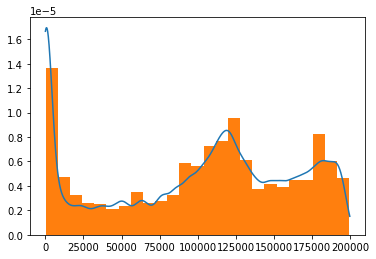

In [28]:
print('La media por montecarlo crudo es de', var_aleatorias_montecarlo_m.mean())
x = np.arange(0,200000,100)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_m,bins = 25,density = True);
plt.show()

#### Generacion de variables aleatorias por medio de reduccion de varianza 


In [35]:
np.random.seed(66666)
def acep_rechazo_strat2_d(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid positivos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    B = 3700
    U2 = np.random.rand(B)
    k = np.arange(0,B)
    v = (U2+k)/B
    j = 0
    while i < N:
        R2 = np.random.uniform(0,max_f)
        R1 = 200000 * v[j]
        j += 1
        if R2 < f([R1]):
            X[i] = R1
            i+=1
    return X 
    
# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
N = 1000
var_aleatorias_strat2_d = acep_rechazo_strat2_d(f,max_fm,N)
len(var_aleatorias_strat2_d)


1000

La media de las variables generadas por estratificado con diferentes intervalos es de 102080.61545403095


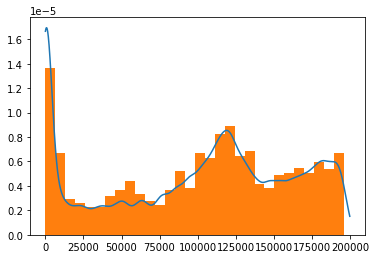

In [30]:
print('La media de las variables generadas por estratificado con diferentes intervalos es de',var_aleatorias_strat2_d.mean() )
x = np.arange(0,200000,100)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_strat2_d,bins = 30,density = True);
plt.show()

**Montecarlo y media de datos**

In [31]:
# Calcular la media real de los muertos
media_real_muertos = np.array(clean_data['death']).mean()
media_real_muertos

98673.64319248826

In [32]:
# Intervalos de confianza y media de los datos
X = var_aleatorias_montecarlo_m
confianza = 0.90
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_muertos= np.mean(X)
#print('Con una confianza de %2.2f la media del numero de muertos por montecarlo crudo estará en el intervalo t,\n %s' %(confianza,i1))
print('Con una confianza de %2.2f la media del numero de muertos por montecarlo crudo estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada del numero de muertos' ,media_muertos)
error_muertos = abs(media_real_muertos - media_muertos)/media_muertos
print('El porcentaje de error entre la media real y la media estimada con montecarlo crudo fue de', error_muertos*100,'%')

Con una confianza de 0.90 la media del numero de muertos por montecarlo crudo estará en el intervalo normal,
 (100246.66351324064, 106519.8914787044)
Media calculada del numero de muertos 103383.27749597252
El porcentaje de error entre la media real y la media estimada con montecarlo crudo fue de 4.555508799445568 %


In [33]:
# Intervalos de confianza y media de los datos
X = var_aleatorias_strat2_d 
confianza = 0.90
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_muertos_strat = np.mean(X)
#print('Con una confianza de %2.2f la media del numero de muertos estará en el intervalo t,\n %s' %(confianza,i1))
print('Con una confianza de %2.2f la media del numero de muertos estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada del numero de muertos' ,media_muertos_strat)
error_muertos = abs(media_real_muertos - media_muertos_strat)/media_muertos_strat
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', error_muertos*100,'%')

Con una confianza de 0.90 la media del numero de muertos estará en el intervalo normal,
 (99001.84663003572, 105159.38427802616)
Media calculada del numero de muertos 102080.61545403095
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 3.3375310742291893 %


> **Conclusiones Escenario 2**

Los resultados obtenidos modelan de forma aceptable el comportamiento de los muertos de covid, y conseguimos con el metodo de Kernel Density Estimation un mejor resultado del que hubieramos obtenido con las distribuciones conocidas, debido a que ninguna modelo de forma correcta los datos.

El metodo estratificado igualmente espaciado si ayudo a disminuir la varianza de los datos, disminuyendo el intervalo de confianza, y modelando de mejor manera los datos 

### OBJETIVO SECUNDARIO: Encontrar por medio de la simulación de Montecarlo la probabilidad de morirse en caso de estar infectado.

In [34]:
print('La probabilidad de morirse en caso de ser positivo en usa es de:', (media_muertos_strat/media_positivos_strat)*100,'%')

La probabilidad de morirse en caso de ser positivo en usa es de: 3.719380512261395 %


> Conclusion objetivo secundario. 

La probabilidad de morirse en caso de ser positivo es de 3.75% aproximadamente, se comprueba que la mortalidad del virus es baja, cosa que ha sido mencionada por varios estadisticos de los estados unidos, que segun estimaciones se encuentra en menor al 4%. https://www.infobae.com/america/eeuu/2020/07/08/donald-trump-afirmo-que-la-tasa-de-mortalidad-del-coronavirus-en-eeuu-es-la-mas-baja-del-mundo-es-la-septima-mas-alta/

Sin embargo, no hay que disminuir la importancia del virus, ya que, aunque el indice de mortalidad es bajo, afecta mucho a personas de la tercera edad.

**Referencias.**

* SRK. (2020). 'Base de Datos COVID - Introduccion' Recuperado el 1 de octubre del 2020 del sitio web: https://www.kaggle.com/sudalairajkumar
* NYTIMES. (2020) 'Mapa CoronaVirus USA'. Recuperado el 1 de octubre del 2020 del sitio web: https://www.nytimes.com/es/interactive/2020/espanol/mundo/coronavirus-en-estados-unidos.html
* Wikipedia. (2020). 'COVID-19'. Recuperado el 15 de octubre del 2020 del sitio web: https://es.wikipedia.org/wiki/COVID-19
* Infobae. (2020). 'Tasa de mortalidad USA' Recuperado el 10 de noviembre del 2020 del sitio web:https://www.infobae.com/america/eeuu/2020/07/08/donald-trump-afirmo-que-la-tasa-de-mortalidad-del-coronavirus-en-eeuu-es-la-mas-baja-del-mundo-es-la-septima-mas-alta/

